In [50]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np

In [52]:
dataYesTrain = np.load('/content/drive/My Drive/InterferenceTrain.npy')
dataYesTrain = np.transpose(dataYesTrain)
dataYesTrain = np.append(np.real(dataYesTrain)[np.newaxis],np.imag(dataYesTrain)[np.newaxis],axis=0)
dataYesTrain = np.swapaxes(dataYesTrain,0,1)
dataYesTrain = np.swapaxes(dataYesTrain,1,2)

dataYesTrain.shape

(72600, 500, 2)

In [53]:
dataNoTrain = np.load('/content/drive/My Drive/noInterferenceTrain.npy')
# dataNo = dataNo[:,:,0] + dataNo[:,:,1] * 1j
dataNoTrain.shape
dataNoTrain = np.append(np.real(dataNoTrain)[np.newaxis],np.imag(dataNoTrain)[np.newaxis],axis=0)
dataNoTrain = np.swapaxes(dataNoTrain,0,1)
dataNoTrain = np.swapaxes(dataNoTrain,1,2)

dataNoTrain.shape




(72600, 500, 2)

In [54]:
dataYesTest = np.load('/content/drive/My Drive/InterferenceTest.npy')
dataYesTest = np.transpose(dataYesTest)
dataYesTest = np.append(np.real(dataYesTest)[np.newaxis],np.imag(dataYesTest)[np.newaxis],axis=0)
dataYesTest = np.swapaxes(dataYesTest,0,1)
dataYesTest = np.swapaxes(dataYesTest,1,2)

dataYesTest.shape

(37400, 500, 2)

In [55]:
dataNoTest = np.load('/content/drive/My Drive/noInterferenceTest.npy')
# dataNo = dataNo[:,:,0] + dataNo[:,:,1] * 1j
dataNoTest.shape
dataNoTest = np.append(np.real(dataNoTest)[np.newaxis],np.imag(dataNoTest)[np.newaxis],axis=0)
dataNoTest = np.swapaxes(dataNoTest,0,1)
dataNoTest = np.swapaxes(dataNoTest,1,2)

dataNoTest.shape




(37400, 500, 2)

In [56]:
!pip install komm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
X_train = np.append(dataYesTrain, dataNoTrain,axis=0)
X_train.shape

(145200, 500, 2)

In [58]:
y_train = np.append(np.zeros((dataYesTrain.shape[0],1)), np.ones((dataNoTrain.shape[0],1)))
y_train.shape
del dataNoTrain
del dataYesTrain

In [59]:
X_test = np.append(dataYesTest, dataNoTest,axis=0)
X_test.shape

(74800, 500, 2)

In [60]:
y_test = np.append(np.zeros((dataYesTest.shape[0],1)), np.ones((dataNoTest.shape[0],1)))
y_test.shape
del dataNoTest
del dataYesTest

In [61]:
from keras import backend as K
def weighted_categorical_crossentropy(weights):
    """
    A weighted version of keras.objectives.categorical_crossentropy
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes
    
    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    
    weights = K.variable(weights)
        
    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    
    return loss

In [62]:
from tensorflow.keras.layers import (Input, Conv1D, Conv2D, Conv3D, SpatialDropout1D, 
                                     MaxPooling1D, MaxPooling2D, MaxPooling3D, Flatten, Concatenate, 
                                     Reshape,
                                     GlobalAveragePooling1D,
                                     Dropout, Dense, BatchNormalization)
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from math import floor
import numpy as np
from tensorflow.keras.utils import plot_model

def build_model(): 
    
    inputLen = 500
    input_ = Input(shape=(inputLen,2))
    
    num_filters = 256
    resulting_filters = 512
    dropout = 0.1
    pooling = True
    
    
    branch_1 = Conv1D(filters=num_filters*2, kernel_size=3, dilation_rate=1, padding='same',activation = 'relu') (input_)
    branch_1 = SpatialDropout1D(dropout)(branch_1)
    branch_1= MaxPooling1D(pool_size=2, strides=2) (branch_1)
    branch_1 = Reshape((int(inputLen/2),resulting_filters,1))(branch_1)
    
    branch_2 = Conv1D(filters=num_filters*2, kernel_size=3, dilation_rate=2, padding='same',activation = 'relu') (input_)
    branch_2 = SpatialDropout1D(dropout)(branch_2)
    branch_2= MaxPooling1D(pool_size=2, strides=2) (branch_2)
    branch_2 = Reshape((int(inputLen/2),resulting_filters,1))(branch_2)
    
    branch_3 = Conv1D(filters=num_filters*2, kernel_size=3, dilation_rate=3, padding='same',activation = 'relu') (input_)
    branch_3 = SpatialDropout1D(dropout)(branch_3)
    branch_3= MaxPooling1D(pool_size=2, strides=2) (branch_3)
    branch_3 = Reshape((int(inputLen/2),resulting_filters,1))(branch_3)
    
    branch_4 = Conv1D(filters=num_filters*2, kernel_size=3, dilation_rate=4, padding='same',activation = 'relu') (input_)
    branch_4 = SpatialDropout1D(dropout)(branch_4)
    branch_4= MaxPooling1D(pool_size=2, strides=2) (branch_4)
    branch_4 = Reshape((int(inputLen/2),resulting_filters,1))(branch_4)
    
    branch_5 = Conv1D(filters=num_filters*2, kernel_size=3, dilation_rate=5, padding='same',activation = 'relu') (input_)
    branch_5 = SpatialDropout1D(dropout)(branch_5)
    branch_5= MaxPooling1D(pool_size=2, strides=2) (branch_5)
    branch_5 = Reshape((int(inputLen/2),resulting_filters,1))(branch_5)
    
    branch_6 = Conv1D(filters=num_filters*2, kernel_size=3, dilation_rate=6, padding='same',activation = 'relu') (input_)
    branch_6 = SpatialDropout1D(dropout)(branch_6)
    branch_6 = MaxPooling1D(pool_size=2, strides=2) (branch_6)
    branch_6 = Reshape((int(inputLen/2),resulting_filters,1))(branch_6)
    





    concat = Concatenate(axis=3) ([branch_1, branch_2, branch_3, branch_4, branch_5,branch_6])
    concat = Conv2D(filters = 512, kernel_size=(3,resulting_filters)) (concat)
    concat = Reshape((248,512))(concat)
    concat = SpatialDropout1D(0.1)(concat)
    for i in range(1,4):
        concat= Conv1D(filters=(int)(256 * (1.2**i)), kernel_size=3,padding="same",activation = 'relu')(concat)
        concat= MaxPooling1D(pool_size=2, strides=2) (concat)
        
    concat= Conv1D(filters=1028, kernel_size=3,padding="valid",activation = 'relu')(concat)
    concat = GlobalAveragePooling1D() (concat)
    dense1 = Flatten()(concat)
    out = Dense(1, activation = 'sigmoid') (dense1)


    model = Model(inputs=input_, outputs=out)
    weights = np.ones((1,))
    weights[0] = 3
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy', metrics.FalsePositives(), metrics.FalseNegatives()])                      
    return model

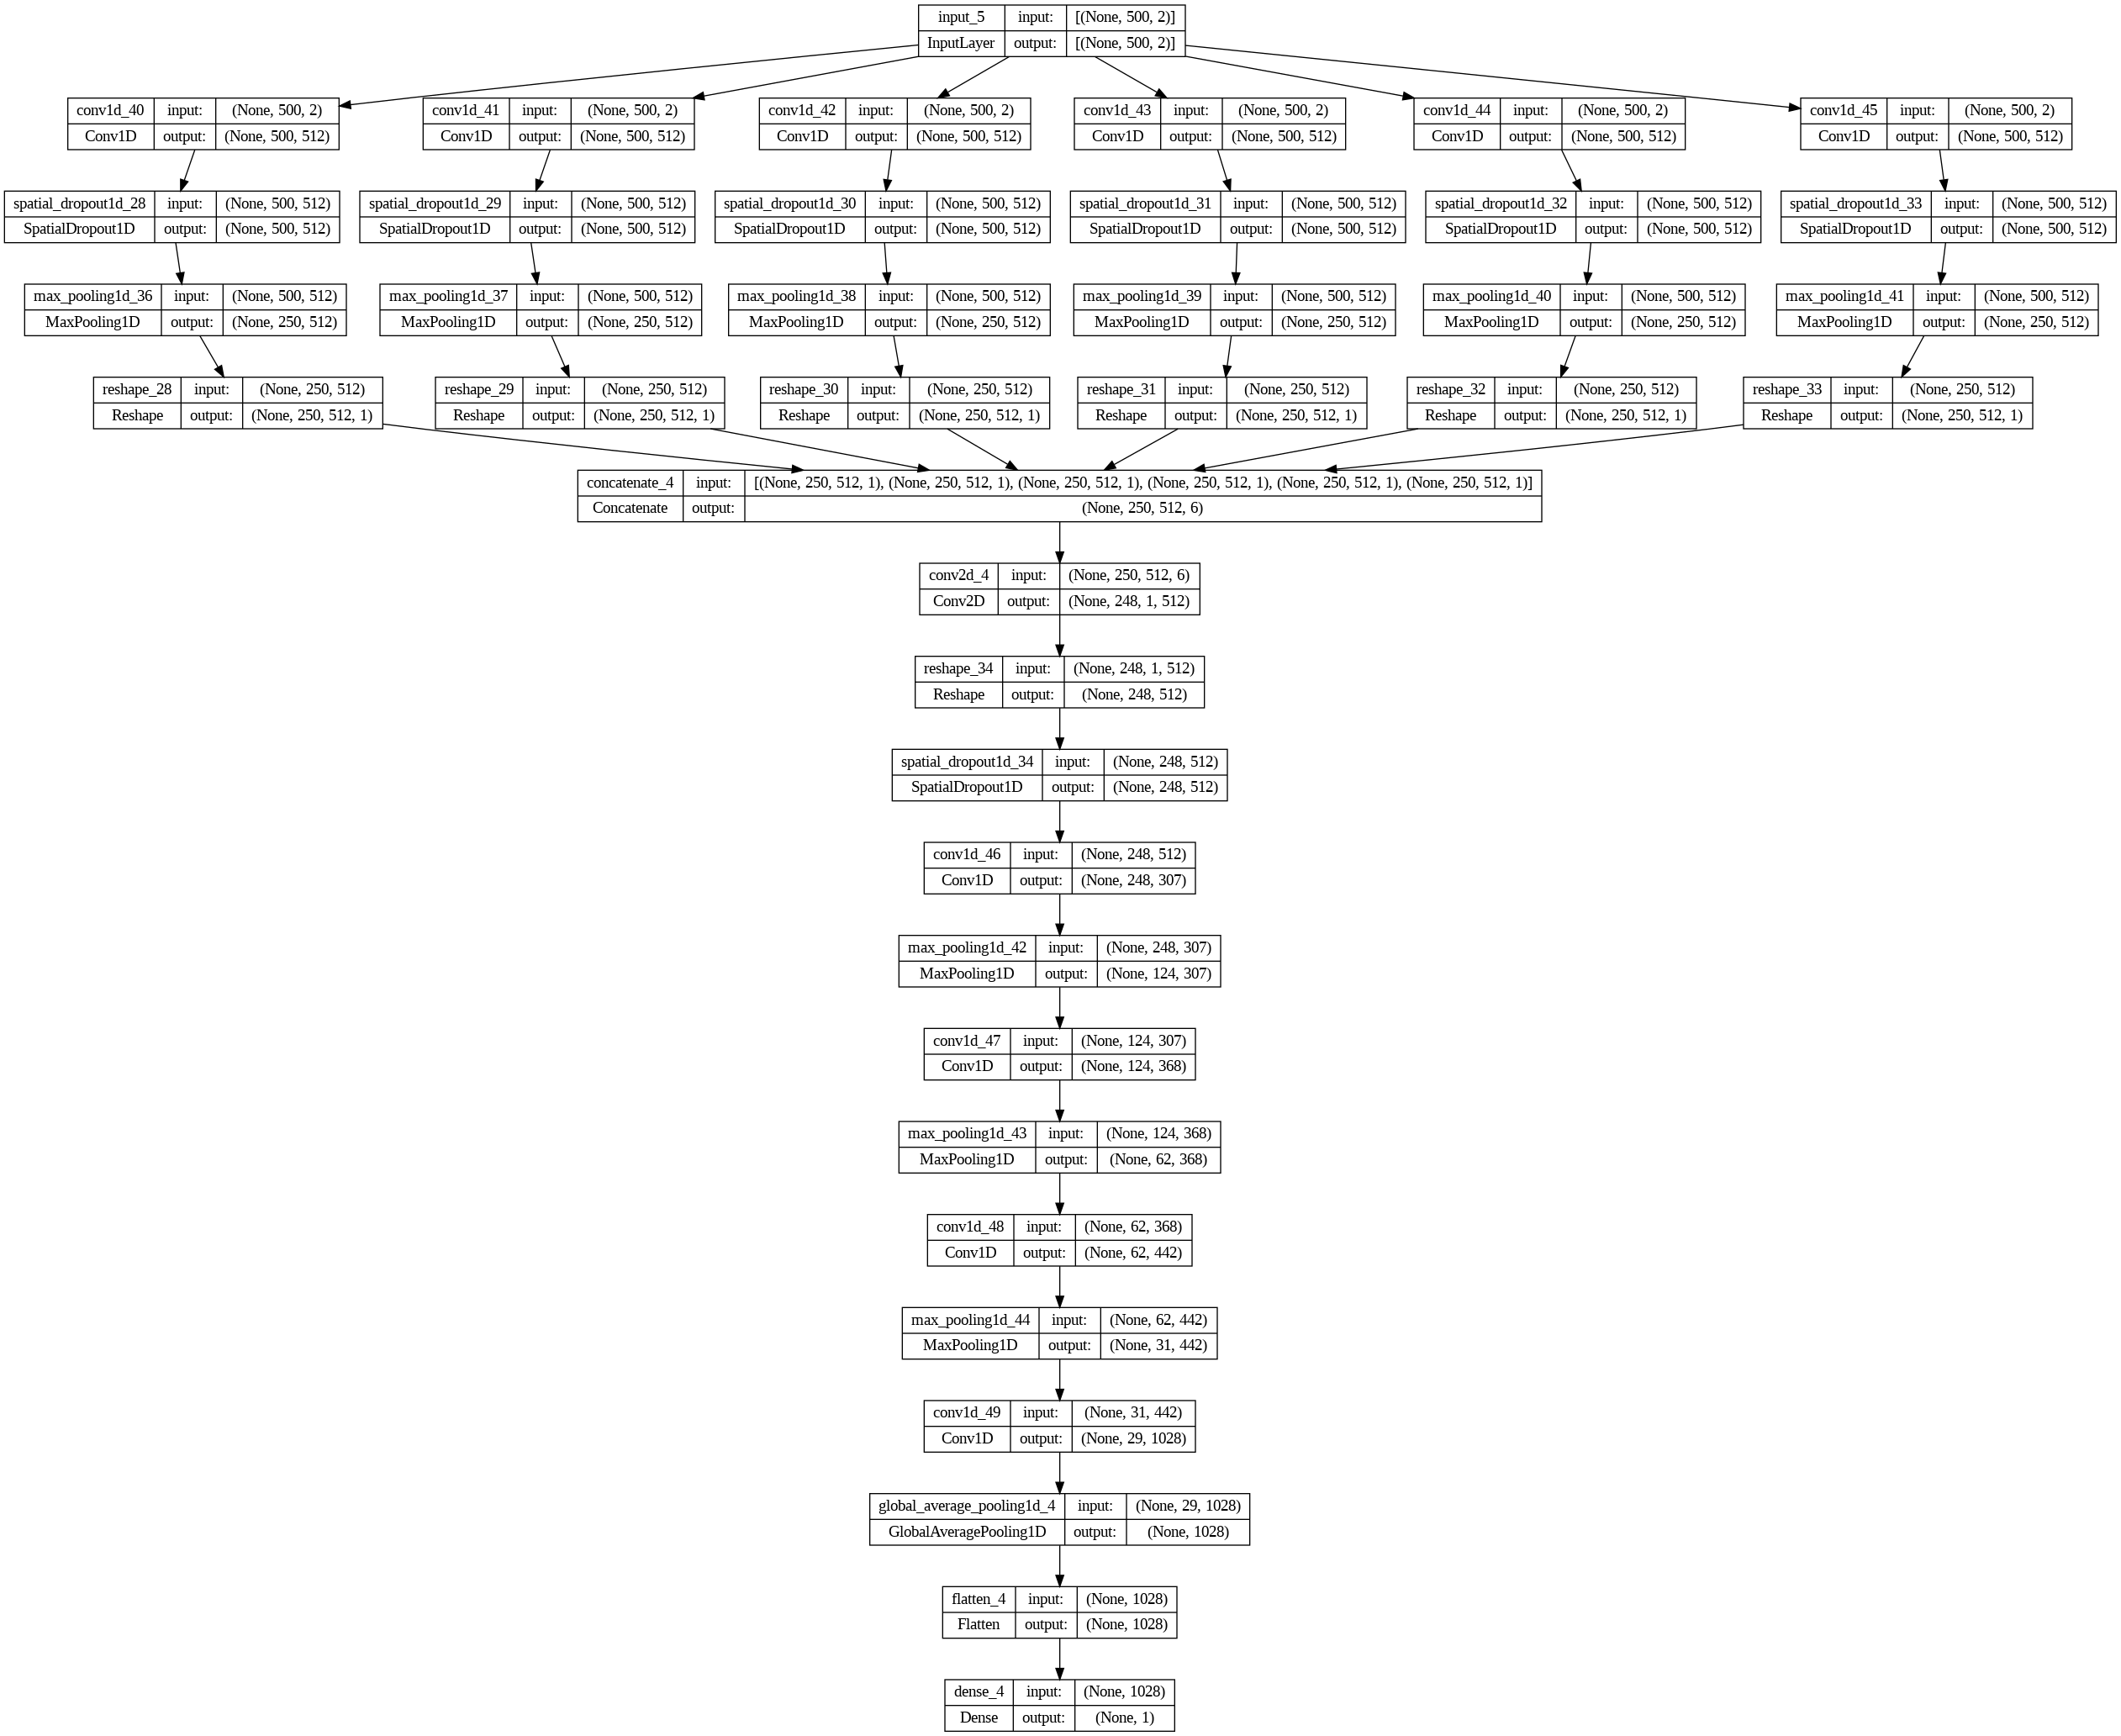

In [63]:
model = build_model()


plot_model(model, show_shapes=True)

In [64]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 500, 2)]     0           []                               
                                                                                                  
 conv1d_40 (Conv1D)             (None, 500, 512)     3584        ['input_5[0][0]']                
                                                                                                  
 conv1d_41 (Conv1D)             (None, 500, 512)     3584        ['input_5[0][0]']                
                                                                                                  
 conv1d_42 (Conv1D)             (None, 500, 512)     3584        ['input_5[0][0]']                
                                                                                            

In [65]:
history = model.fit(x=X_train   , y=y_train, validation_data=(X_test, y_test), epochs=2, batch_size=100)

Epoch 1/2
1452/1452 [==============================] - 741s 507ms/step - loss: 0.4783 - accuracy: 0.7580 - false_positives_4: 18700.0000 - false_negatives_4: 16435.0000 - val_loss: 0.4501 - val_accuracy: 0.7785 - val_false_positives_4: 8787.0000 - val_false_negatives_4: 7783.0000
Epoch 2/2
1452/1452 [==============================] - 735s 506ms/step - loss: 0.4485 - accuracy: 0.7831 - false_positives_4: 19351.0000 - false_negatives_4: 12144.0000 - val_loss: 0.4488 - val_accuracy: 0.7901 - val_false_positives_4: 12057.0000 - val_false_negatives_4: 3647.0000


In [66]:
model.save('/content/drive/My Drive/model50K')